In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
import joblib
import matplotlib.pyplot as plt
import sys
from icecream import ic
sys.path.append('./src')
import warnings
  
warnings.filterwarnings('ignore')
from src.data import load_data_part1, CustomAnalyzer
from src.eval import print_score
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_data_part1()
def create_n_sentence(y, n):
    """
    
    """
    prev_y_value = y[0]
    bloc_list = []
    current_bloc = []
    current_bloc_length = 0

    for idx in range(len(y)):
        if current_bloc_length < n:
            current_bloc_length += 1
            if prev_y_value == y[idx]:
                current_bloc.append(idx)
            else:
                bloc_list.append(current_bloc)
                current_bloc = [idx]
                current_bloc_length = 1
        else:
            bloc_list.append(current_bloc)
            current_bloc = [idx]
            current_bloc_length = 1
        prev_y_value = y[idx]
    bloc_list.append(current_bloc)
    return bloc_list
    
nested_idx = create_n_sentence(y, 2)
nested_idx[0:5], y[0:14]

([[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]],
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1]))

In [3]:
def create_nested_dataset(X, y, n):
    def merge_string(l):
        s = ""
        for i in l:
            s += i
        return s
    
    new_X = []
    new_y = []
    nested_idx = create_n_sentence(y, n)
    for idx_list in nested_idx:
        new_X.append(merge_string(X[idx_list]))
        new_y.append(y[idx_list[0]])
    return new_X, new_y, nested_idx

nested_X, nested_y, nested_idx = create_nested_dataset(X, y, 2)
nested_X[0], X[nested_idx[0]], nested_y[0]

(" Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.\n D'abord merci de cet exceptionnel accueil que les Congolais, les Brazavillois, nous ont réservé cet après-midi.\n",
 array([" Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.\n",
        " D'abord merci de cet exceptionnel accueil que les Congolais, les Brazavillois, nous ont réservé cet après-midi.\n"],
       dtype='<U2530'),
 1)

In [4]:
d = joblib.load("./part1_speaker_recognition/gridsearch/results/part1_hrscv_LogisticRegression.pkl")

nested_X, nested_y, nested_idx = create_nested_dataset(X, y, 2)
X_train, X_test, y_train, y_test = train_test_split(nested_X, nested_y)
pipeline = d.best_estimator_
pipeline.fit(X_train, y_train)
print(y_train)
y_hat = pipeline.predict(X_test)

100%|██████████| 21687/21687 [00:03<00:00, 5947.45it/s]


[1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1

100%|██████████| 7229/7229 [00:01<00:00, 6610.81it/s]


In [5]:
print_score(y_test, y_hat, "oui")


    oui :
    =====
    Macro F1-score : 0.8449847047243237
    Micro F1-score : 0.9243325494535897
    Macro ROC-AUC: 0.8499928735024413
    Weighted ROC-AUC: 0.8499928735024413
    Classification report :
                  precision    recall  f1-score   support

          -1       0.72      0.75      0.73      1011
           1       0.96      0.95      0.96      6218

    accuracy                           0.92      7229
   macro avg       0.84      0.85      0.84      7229
weighted avg       0.93      0.92      0.92      7229

    =====
    


{'-1': {'precision': 0.7217973231357553,
  'recall': 0.7467853610286844,
  'f1-score': 0.7340787554691298,
  'support': 1011},
 '1': {'precision': 0.9585961507358888,
  'recall': 0.9532003859761982,
  'f1-score': 0.9558906539795178,
  'support': 6218},
 'accuracy': 0.9243325494535897,
 'macro avg': {'precision': 0.8401967369358221,
  'recall': 0.8499928735024413,
  'f1-score': 0.8449847047243237,
  'support': 7229},
 'weighted avg': {'precision': 0.9254790370681982,
  'recall': 0.9243325494535897,
  'f1-score': 0.9248695128266609,
  'support': 7229},
 'macro_auc': 0.8499928735024413,
 'micro_auc': 0.8499928735024413}

In [6]:
nested_X, nested_y, _ = create_nested_dataset(X, y, 3)
X_train, X_test, y_train, y_test = train_test_split(nested_X, nested_y)
pipeline = d.best_estimator_
pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)
print_score(y_test, y_hat, "oui")

100%|██████████| 4851/4851 [00:01<00:00, 4041.00it/s]



    oui :
    =====
    Macro F1-score : 0.8771043771043772
    Micro F1-score : 0.9398062255205112
    Macro ROC-AUC: 0.8789319218947573
    Weighted ROC-AUC: 0.8789319218947573
    Classification report :
                  precision    recall  f1-score   support

          -1       0.78      0.79      0.79       689
           1       0.97      0.96      0.96      4162

    accuracy                           0.94      4851
   macro avg       0.88      0.88      0.88      4851
weighted avg       0.94      0.94      0.94      4851

    =====
    


{'-1': {'precision': 0.7847919655667145,
  'recall': 0.7939042089985486,
  'f1-score': 0.7893217893217894,
  'support': 689},
 '1': {'precision': 0.9658160808858931,
  'recall': 0.9639596347909659,
  'f1-score': 0.964886964886965,
  'support': 4162},
 'accuracy': 0.9398062255205112,
 'macro avg': {'precision': 0.8753040232263039,
  'recall': 0.8789319218947573,
  'f1-score': 0.8771043771043772,
  'support': 4851},
 'weighted avg': {'precision': 0.9401047604457953,
  'recall': 0.9398062255205112,
  'f1-score': 0.9399509916929006,
  'support': 4851},
 'macro_auc': 0.8789319218947573,
 'micro_auc': 0.8789319218947573}

In [7]:
nested_X, nested_y, _ = create_nested_dataset(X, y, 4)
X_train, X_test, y_train, y_test = train_test_split(nested_X, nested_y)
pipeline = d.best_estimator_
pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)
print_score(y_test, y_hat, "oui")

100%|██████████| 3664/3664 [00:01<00:00, 3052.28it/s]



    oui :
    =====
    Macro F1-score : 0.8939058904847452
    Micro F1-score : 0.949235807860262
    Macro ROC-AUC: 0.8888161578464399
    Weighted ROC-AUC: 0.8888161578464399
    Classification report :
                  precision    recall  f1-score   support

          -1       0.83      0.80      0.82       517
           1       0.97      0.97      0.97      3147

    accuracy                           0.95      3664
   macro avg       0.90      0.89      0.89      3664
weighted avg       0.95      0.95      0.95      3664

    =====
    


{'-1': {'precision': 0.8303393213572854,
  'recall': 0.804642166344294,
  'f1-score': 0.8172888015717091,
  'support': 517},
 '1': {'precision': 0.9680682895984825,
  'recall': 0.972990149348586,
  'f1-score': 0.9705229793977813,
  'support': 3147},
 'accuracy': 0.949235807860262,
 'macro avg': {'precision': 0.8992038054778839,
  'recall': 0.88881615784644,
  'f1-score': 0.8939058904847452,
  'support': 3664},
 'weighted avg': {'precision': 0.9486343713177241,
  'recall': 0.949235807860262,
  'f1-score': 0.9489012354195937,
  'support': 3664},
 'macro_auc': 0.8888161578464399,
 'micro_auc': 0.8888161578464399}

100%|██████████| 2951/2951 [00:01<00:00, 2684.14it/s]


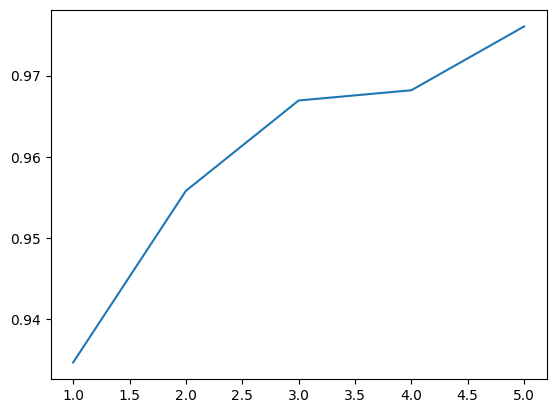

In [8]:
score_list = []
param_list = []
for i in range(1, 6):
    nested_X, nested_y, _ = create_nested_dataset(X, y, i)
    X_train, X_test, y_train, y_test = train_test_split(nested_X, nested_y)
    pipeline = d.best_estimator_
    pipeline.fit(X_train, y_train)
    y_hat = pipeline.predict(X_test)
    score_list.append(f1_score(y_test, y_hat))
    param_list.append(i)
plt.plot(param_list, score_list)

Ca marche bien mais on triche dans le train test split

In [9]:
def unnest_result(y_hat_nested, nested_idx):
    l = []
    for i, idx_list in enumerate(nested_idx):
        for _ in idx_list:
            l.append(y_hat_nested[i])
    return l

100%|██████████| 14354/14354 [00:01<00:00, 12616.21it/s]



     :
    =====
    Macro F1-score : 0.7784212832210713
    Micro F1-score : 0.8943151734708096
    Macro ROC-AUC: 0.7962457202084012
    Weighted ROC-AUC: 0.7962457202084012
    Classification report :
                  precision    recall  f1-score   support

          -1       0.58      0.66      0.62      1849
           1       0.95      0.93      0.94     12505

    accuracy                           0.89     14354
   macro avg       0.76      0.80      0.78     14354
weighted avg       0.90      0.89      0.90     14354

    =====
    


100%|██████████| 7177/7177 [00:01<00:00, 6672.83it/s]



     :
    =====
    Macro F1-score : 0.658705716824568
    Micro F1-score : 0.8491709627978264
    Macro ROC-AUC: 0.6562720287763748
    Weighted ROC-AUC: 0.6562720287763748
    Classification report :
                  precision    recall  f1-score   support

          -1       0.41      0.40      0.40      1849
           1       0.91      0.92      0.91     12505

    accuracy                           0.85     14354
   macro avg       0.66      0.66      0.66     14354
weighted avg       0.85      0.85      0.85     14354

    =====
    


100%|██████████| 4785/4785 [00:01<00:00, 3350.05it/s]



     :
    =====
    Macro F1-score : 0.6025408896119961
    Micro F1-score : 0.8463842831266546
    Macro ROC-AUC: 0.5901515867422636
    Weighted ROC-AUC: 0.5901515867422636
    Classification report :
                  precision    recall  f1-score   support

          -1       0.36      0.24      0.29      1849
           1       0.89      0.94      0.91     12505

    accuracy                           0.85     14354
   macro avg       0.63      0.59      0.60     14354
weighted avg       0.82      0.85      0.83     14354

    =====
    


100%|██████████| 3589/3589 [00:01<00:00, 3302.03it/s]



     :
    =====
    Macro F1-score : 0.5580054524416401
    Micro F1-score : 0.855440992057963
    Macro ROC-AUC: 0.5490325881545706
    Weighted ROC-AUC: 0.5490325881545706
    Classification report :
                  precision    recall  f1-score   support

          -1       0.35      0.14      0.20      1849
           1       0.88      0.96      0.92     12505

    accuracy                           0.86     14354
   macro avg       0.61      0.55      0.56     14354
weighted avg       0.81      0.86      0.83     14354

    =====
    


100%|██████████| 2871/2871 [00:01<00:00, 2402.36it/s]



     :
    =====
    Macro F1-score : 0.5359453135862493
    Micro F1-score : 0.8589243416469277
    Macro ROC-AUC: 0.5337493558552783
    Weighted ROC-AUC: 0.5337493558552783
    Classification report :
                  precision    recall  f1-score   support

          -1       0.33      0.10      0.15      1849
           1       0.88      0.97      0.92     12505

    accuracy                           0.86     14354
   macro avg       0.61      0.53      0.54     14354
weighted avg       0.81      0.86      0.82     14354

    =====
    


100%|██████████| 2393/2393 [00:01<00:00, 2036.66it/s]



     :
    =====
    Macro F1-score : 0.507747473409081
    Micro F1-score : 0.8635223631043611
    Macro ROC-AUC: 0.5177232730488118
    Weighted ROC-AUC: 0.5177232730488118
    Classification report :
                  precision    recall  f1-score   support

          -1       0.32      0.05      0.09      1849
           1       0.88      0.98      0.93     12505

    accuracy                           0.86     14354
   macro avg       0.60      0.52      0.51     14354
weighted avg       0.80      0.86      0.82     14354

    =====
    


100%|██████████| 2051/2051 [00:00<00:00, 2091.18it/s]



     :
    =====
    Macro F1-score : 0.493194872954234
    Micro F1-score : 0.8667270447262089
    Macro ROC-AUC: 0.5110365372509731
    Weighted ROC-AUC: 0.5110365372509731
    Classification report :
                  precision    recall  f1-score   support

          -1       0.32      0.03      0.06      1849
           1       0.87      0.99      0.93     12505

    accuracy                           0.87     14354
   macro avg       0.60      0.51      0.49     14354
weighted avg       0.80      0.87      0.82     14354

    =====
    


100%|██████████| 1795/1795 [00:01<00:00, 1606.01it/s]



     :
    =====
    Macro F1-score : 0.48493128672972824
    Micro F1-score : 0.8682597185453532
    Macro ROC-AUC: 0.507537969128195
    Weighted ROC-AUC: 0.507537969128195
    Classification report :
                  precision    recall  f1-score   support

          -1       0.33      0.02      0.04      1849
           1       0.87      0.99      0.93     12505

    accuracy                           0.87     14354
   macro avg       0.60      0.51      0.48     14354
weighted avg       0.80      0.87      0.81     14354

    =====
    


100%|██████████| 1595/1595 [00:01<00:00, 1545.20it/s]



     :
    =====
    Macro F1-score : 0.47372706136504994
    Micro F1-score : 0.8702800613069528
    Macro ROC-AUC: 0.5031671268755884
    Weighted ROC-AUC: 0.5031671268755884
    Classification report :
                  precision    recall  f1-score   support

          -1       0.36      0.01      0.02      1849
           1       0.87      1.00      0.93     12505

    accuracy                           0.87     14354
   macro avg       0.61      0.50      0.47     14354
weighted avg       0.81      0.87      0.81     14354

    =====
    


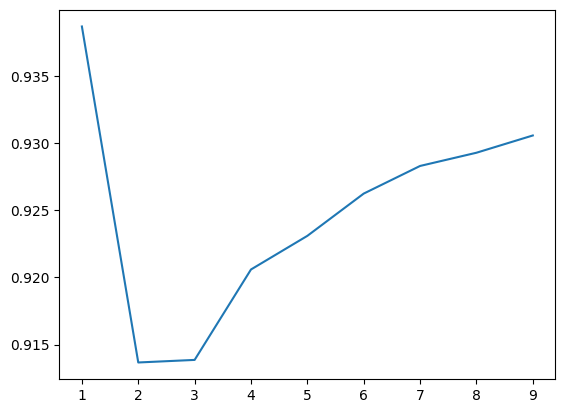

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

score_list = []
param_list = []
for i in range(1, 10):
    nested_X_train, nested_y_train, _  = create_nested_dataset(X_train, y_train, i)
    nested_X_test, nested_y_test, nested_idx = create_nested_dataset(X_test, [1 for i in range(len(X_test))], i) # sans regarder les y 


    pipeline = d.best_estimator_
    pipeline.fit(nested_X_train, nested_y_train)
    y_hat_nested = pipeline.predict(nested_X_test)
    
    y_hat = unnest_result(y_hat_nested, nested_idx)
    print_score(y_test, y_hat)
    score_list.append(f1_score(y_test, y_hat))
    param_list.append(i)
plt.plot(param_list, score_list)